In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

### 1. Data Processing

In [19]:
# Import the data
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
print(train.shape, test.shape)

(507, 148) (168, 148)


In [20]:
# Remove any rows that have missing data across both sets of data
train.dropna(inplace=True)
test.dropna(inplace=True)
print(train.shape, test.shape)

(507, 148) (168, 148)


In [21]:
test.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,car,1.27,91,0.97,231.38,1.39,1.47,207.92,241.74,244.48,...,26.18,2.00,0.50,0.85,6.29,1.67,0.70,-0.08,56,3806.36
1,concrete,2.36,241,1.56,216.15,2.46,2.51,187.85,229.39,231.20,...,22.29,2.25,0.79,0.55,8.42,1.38,0.81,-0.09,1746,1450.14
2,concrete,2.12,266,1.47,232.18,2.07,2.21,206.54,244.22,245.79,...,15.59,2.19,0.76,0.74,7.24,1.68,0.81,-0.07,566,1094.04
3,concrete,2.42,399,1.28,230.40,2.49,2.73,204.60,243.27,243.32,...,13.51,3.34,0.82,0.74,7.44,1.36,0.92,-0.09,1178,1125.38
4,concrete,2.15,944,1.73,193.18,2.28,4.10,165.98,205.55,208.00,...,15.65,50.08,0.85,0.49,8.15,0.23,1.00,-0.08,6232,1146.38


In [22]:
# Create X & y objects 
cols_train = list(train.columns.values) 
cols_train.pop(cols_train.index('class')) 
X_train = train[cols_train] 
y_train = train['class']

cols_test = list(test.columns.values) 
cols_test.pop(cols_test.index('class')) 
X_test = test[cols_test] 
y_test = test['class']

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape,)

(507, 147) (507,) (168, 147) (168,)


In [31]:
# Scale all features / predictors (NOT THE TARGET VARIABLE)
scaler = StandardScaler()
#print(scaler.fit(data))

normalized_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
normalized_X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [50]:
print(normalized_X_train.shape,normalized_X_test.shape)

(507, 147) (168, 147)


### 2. Random Forest Classifier - Base Model

In [24]:
# Fit the RandomForestClassifier model on the training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Use the fitted model to predict on test data. 
y_pred = rf.predict(X_test)

print(y_pred[:10])

['car ' 'concrete ' 'building ' 'concrete ' 'concrete ' 'grass ' 'car '
 'car ' 'building ' 'tree ']


In [26]:
# Calculate the confusion matrix and classification report 
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    asphalt        0.70      1.00      0.82        14
   building        0.76      0.88      0.81        25
        car        0.93      0.87      0.90        15
   concrete        0.69      0.78      0.73        23
      grass        0.86      0.86      0.86        29
       pool        1.00      0.87      0.93        15
     shadow        1.00      0.81      0.90        16
       soil        1.00      0.36      0.53        14
       tree        0.79      0.88      0.83        17

    accuracy                           0.82       168
   macro avg       0.86      0.81      0.81       168
weighted avg       0.85      0.82      0.82       168

[[14  0  0  0  0  0  0  0  0]
 [ 1 22  0  2  0  0  0  0  0]
 [ 1  1 13  0  0  0  0  0  0]
 [ 0  5  0 18  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  4]
 [ 1  0  1  0  0 13  0  0  0]
 [ 3  0  0  0  0  0 13  0  0]
 [ 0  1  0  5  3  0  0  5  0]
 [ 0  0  0  1  1  0  0  0 15]]


In [27]:
# Calculate predictions for the training data & build the classification report & confusion matrix. 
y_pred_train = rf.predict(X_train)

print(y_pred_train[:10])

['concrete ' 'shadow ' 'shadow ' 'tree ' 'asphalt ' 'building ' 'asphalt '
 'grass ' 'tree ' 'building ']


In [28]:
# Calculate the confusion matrix and classification report 
# Are there signs of overfitting? Why or why not?
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

# As shown in the chart below, the "Accuracy" (measured against the training set) is very good whereas the "Validation
# Accuracy" (measured against a validation set) is not as good as the previous one. The model is a bit overfitting.

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        1.00      1.00      1.00        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      1.00      1.00        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        1.00      1.00      1.00        89

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1.00      1.00       507

[[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  0  0 93  0  0  0  0  0]
 [ 0  0  0  0 83  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 89]]


Feature: 0, Score: 0.00150
Feature: 1, Score: 0.00488
Feature: 2, Score: 0.00187
Feature: 3, Score: 0.02359
Feature: 4, Score: 0.00196
Feature: 5, Score: 0.00298
Feature: 6, Score: 0.01737
Feature: 7, Score: 0.02488
Feature: 8, Score: 0.02937
Feature: 9, Score: 0.01187
Feature: 10, Score: 0.00491
Feature: 11, Score: 0.00605
Feature: 12, Score: 0.00162
Feature: 13, Score: 0.00223
Feature: 14, Score: 0.00208
Feature: 15, Score: 0.00167
Feature: 16, Score: 0.00163
Feature: 17, Score: 0.00240
Feature: 18, Score: 0.04275
Feature: 19, Score: 0.00706
Feature: 20, Score: 0.00229
Feature: 21, Score: 0.00287
Feature: 22, Score: 0.00419
Feature: 23, Score: 0.00193
Feature: 24, Score: 0.01786
Feature: 25, Score: 0.00205
Feature: 26, Score: 0.00393
Feature: 27, Score: 0.02178
Feature: 28, Score: 0.02897
Feature: 29, Score: 0.02598
Feature: 30, Score: 0.00614
Feature: 31, Score: 0.00484
Feature: 32, Score: 0.00525
Feature: 33, Score: 0.00211
Feature: 34, Score: 0.00453
Feature: 35, Score: 0.00127
Fe

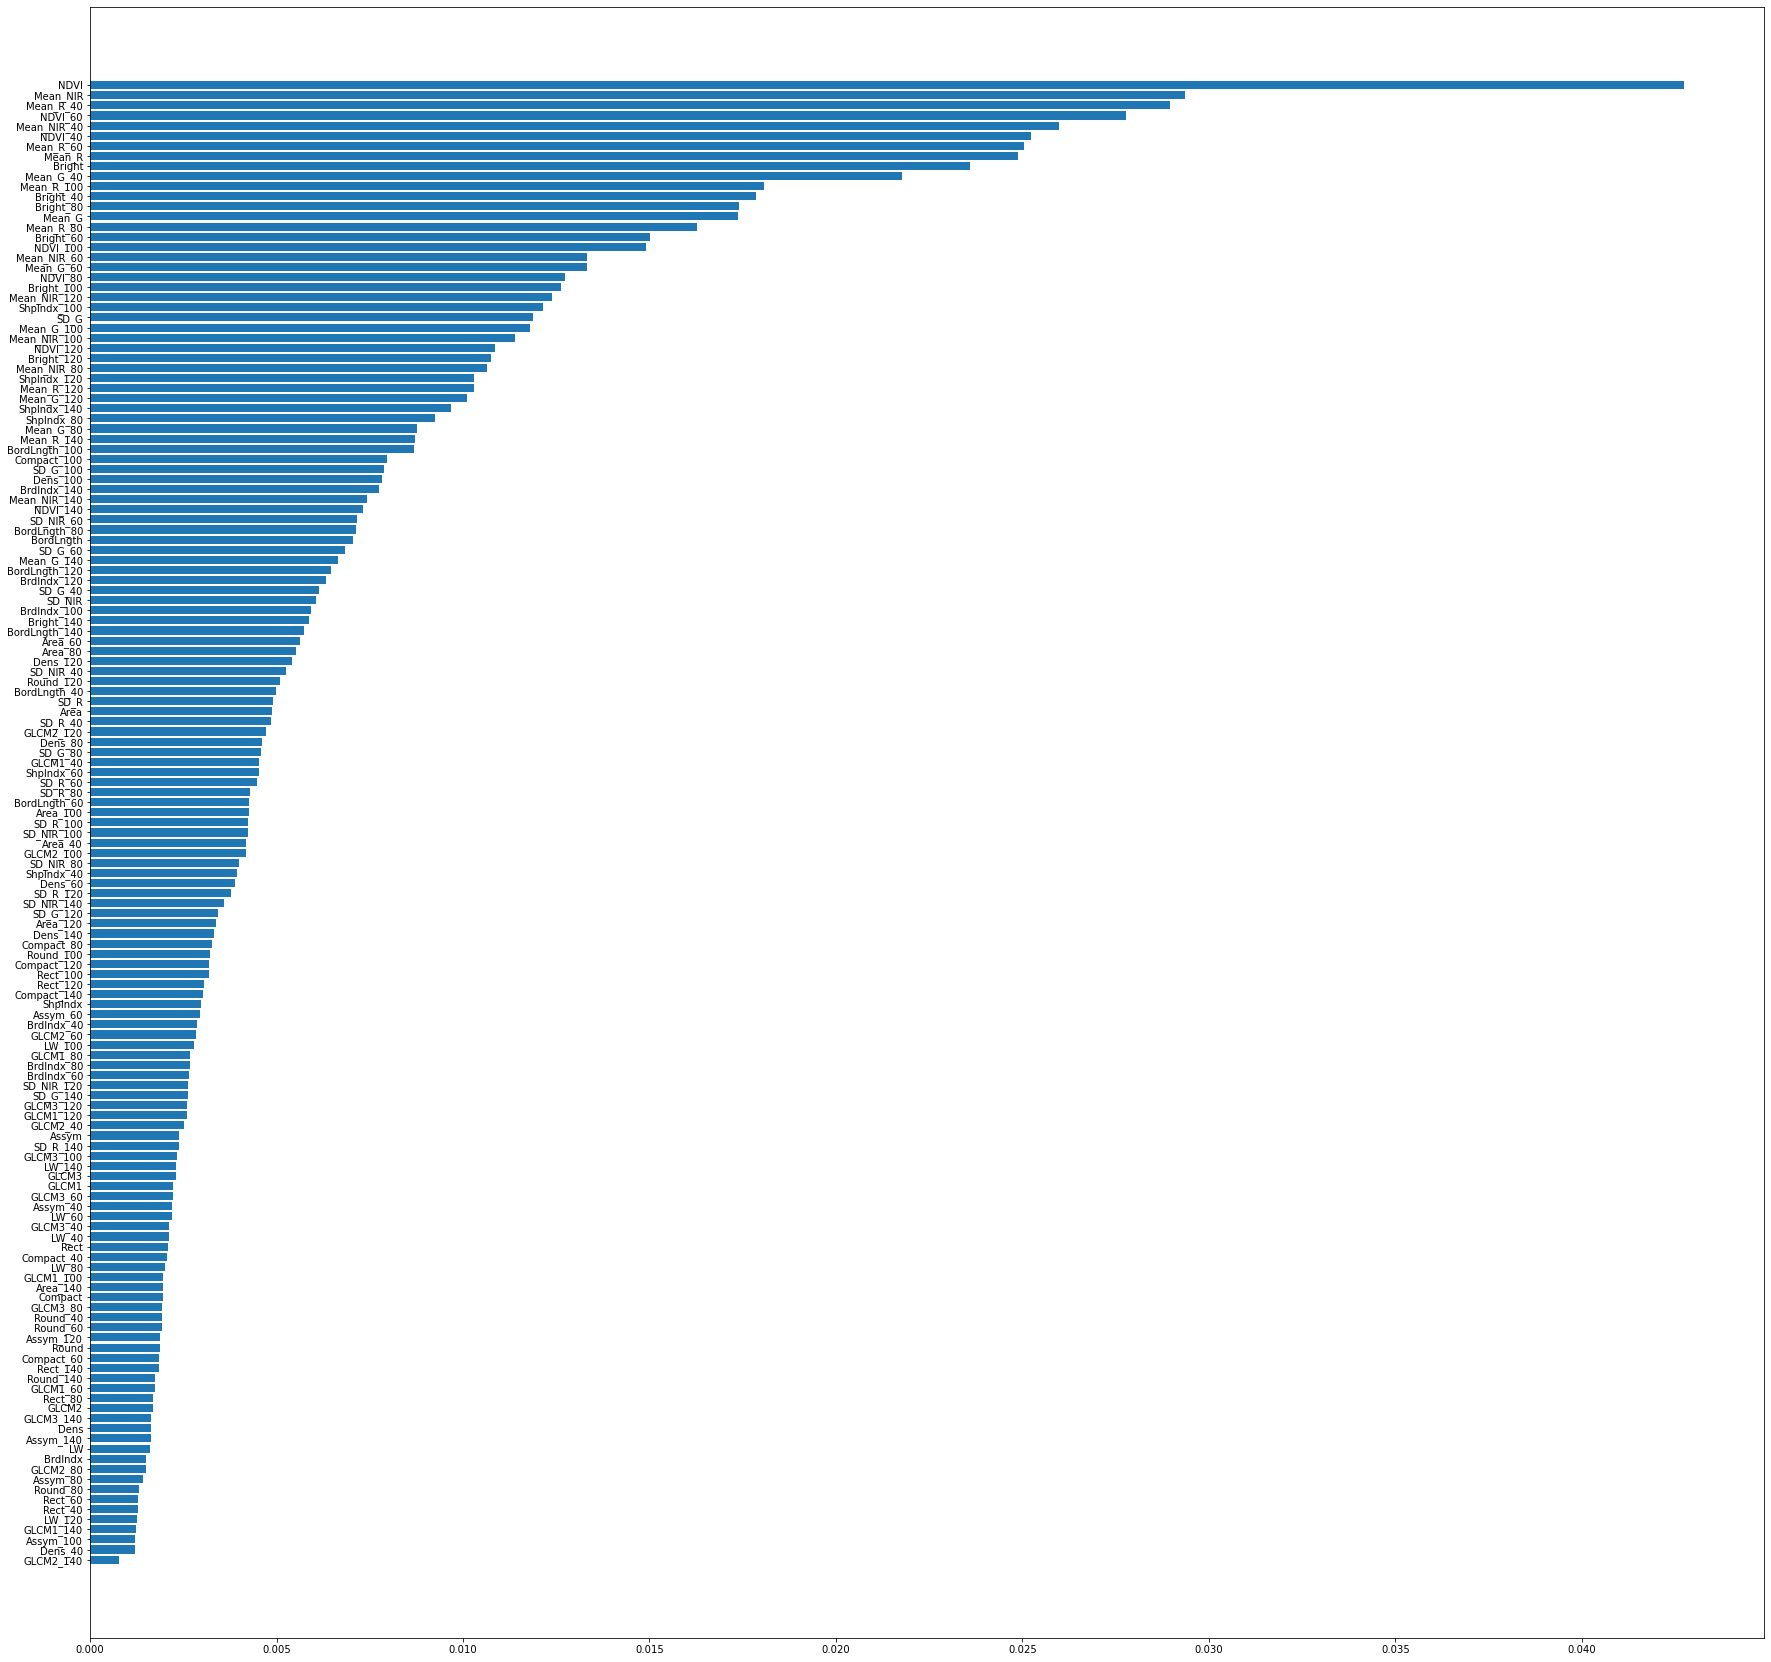

In [29]:
# Identify the top 5 features
# get importance
importance = rf.feature_importances_

features = X_train.columns
indices = np.argsort(importance)

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.figure(figsize=(30, 30))
plt.barh(range(len(importance)), importance[indices])
plt.yticks(range(len(importance)), [features[i] for i in indices])
         
plt.show()

# From the graph below, we know that the top 5 features are:
# NDVI, Mean_NIR, Mean_R_40, NDVI_60, and Mean_NIR_40

### 3.  LinearSVM Classifier - Base Model

In [33]:
# Create a simple LinearSVC Classifier only using default parameters
from sklearn.svm import LinearSVC
Linearsvc = LinearSVC(random_state=0)

In [34]:
# Use the LinearSVC in sklearn. Fit your model on the training data.
Linearsvc.fit(normalized_X_train, y_train)

LinearSVC(random_state=0)

In [35]:
# Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.
y_pred = Linearsvc.predict(normalized_X_test)
print(y_pred[:10])

['car ' 'concrete ' 'building ' 'concrete ' 'asphalt ' 'tree ' 'car '
 'car ' 'building ' 'tree ']


In [36]:
# Calculate the confusion matrix and classification report for test data.
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    asphalt        0.72      0.93      0.81        14
   building        0.68      0.84      0.75        25
        car        0.92      0.80      0.86        15
   concrete        0.70      0.70      0.70        23
      grass        0.75      0.72      0.74        29
       pool        1.00      0.80      0.89        15
     shadow        0.87      0.81      0.84        16
       soil        1.00      0.36      0.53        14
       tree        0.61      0.82      0.70        17

    accuracy                           0.76       168
   macro avg       0.80      0.75      0.76       168
weighted avg       0.78      0.76      0.75       168

[[13  0  0  0  0  0  1  0  0]
 [ 0 21  0  2  2  0  0  0  0]
 [ 0  1 12  1  0  0  0  0  1]
 [ 1  5  0 16  0  0  0  0  1]
 [ 1  0  0  1 21  0  0  0  6]
 [ 1  0  1  0  0 12  1  0  0]
 [ 2  0  0  0  0  0 13  0  1]
 [ 0  4  0  2  3  0  0  5  0]
 [ 0  0  0  1  2  0  0  0 14]]


In [37]:
# Calculate predictions for the training data 
y_pred_train = Linearsvc.predict(normalized_X_train)
print(y_pred_train[:10])

['concrete ' 'shadow ' 'shadow ' 'tree ' 'asphalt ' 'building ' 'asphalt '
 'grass ' 'tree ' 'building ']


In [38]:
# Calculate the confusion matrix and classification report 
# Are there signs of overfitting? Why or why not?
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))

# As shown in the chart below, the "Accuracy" (measured against the training set) is very good (0.99) whereas the 
# "Validation Accuracy" (measured against a validation set) is not as good as the previous one (0.76). 
# The model is overfitting.

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.99      1.00      0.99        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      0.96      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        0.98      1.00      0.99        89

    accuracy                           0.99       507
   macro avg       1.00      1.00      1.00       507
weighted avg       0.99      0.99      0.99       507

[[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  0  0 93  0  0  0  0  0]
 [ 0  1  0  0 80  0  0  0  2]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 89]]


### 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:

In [39]:
# We will now use GridSearchCV to try various hyperparameters in a SVM with linear kernel
# Use SVC from sklearn with kernel = "linear"
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')

# Look at parameters used by our current model
print('Parameters currently in use:\n')
pprint(svm_linear.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [43]:
# Run the GridSearchCV using C: 0.01 - 10 in increments of 0.2
C = [x for x in np.arange(0.01, 10, 0.2)]
    
# Create the random grid
param_grid = {'C': C}

# Use 5 cross-fold and the default scoring. Please set verbose = 0 to reduce the printing
svm_linear_Grid = GridSearchCV(svm_linear, param_grid, cv = 5, verbose = 0)

svm_linear_Grid.fit(normalized_X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...]})

In [45]:
# Identify the best performing model:

# .best_params_() : This method outputs to best performing parameters
# .best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test
best_param = svm_linear_Grid.best_params_

best_grid = svm_linear_Grid.best_estimator_

print(best_param)
print(best_grid)

{'C': 0.01}
SVC(C=0.01, kernel='linear')


In [46]:
# Use the best estimator model to predict on test data. 
# Use the .predict() method to get the predicted classes.

svm_linear_Grid_y_pred = svm_linear_Grid.predict(normalized_X_test)

print(svm_linear_Grid_y_pred[:10])

['car ' 'concrete ' 'building ' 'concrete ' 'concrete ' 'tree ' 'car '
 'car ' 'building ' 'tree ']


In [47]:
# Calculate the confusion matrix and classification report 
print(classification_report(y_test, svm_linear_Grid_y_pred))
print(confusion_matrix(y_test, svm_linear_Grid_y_pred))

              precision    recall  f1-score   support

    asphalt        0.81      0.93      0.87        14
   building        0.79      0.88      0.83        25
        car        1.00      0.93      0.97        15
   concrete        0.66      0.83      0.73        23
      grass        0.86      0.86      0.86        29
       pool        1.00      0.87      0.93        15
     shadow        0.87      0.81      0.84        16
       soil        0.80      0.29      0.42        14
       tree        0.84      0.94      0.89        17

    accuracy                           0.83       168
   macro avg       0.85      0.82      0.81       168
weighted avg       0.84      0.83      0.82       168

[[13  0  0  0  0  0  1  0  0]
 [ 0 22  0  2  1  0  0  0  0]
 [ 0  1 14  0  0  0  0  0  0]
 [ 0  3  0 19  0  0  0  1  0]
 [ 0  0  0  1 25  0  0  0  3]
 [ 0  1  0  0  0 13  1  0  0]
 [ 3  0  0  0  0  0 13  0  0]
 [ 0  1  0  6  3  0  0  4  0]
 [ 0  0  0  1  0  0  0  0 16]]


In [48]:
# Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. 
svm_linear_Grid_y_pred_train = svm_linear_Grid.predict(normalized_X_train)

print(svm_linear_Grid_y_pred_train[:10])

['concrete ' 'shadow ' 'shadow ' 'tree ' 'asphalt ' 'concrete ' 'asphalt '
 'grass ' 'grass ' 'asphalt ']


In [49]:
print(classification_report(y_train, svm_linear_Grid_y_pred_train))
print(confusion_matrix(y_train, svm_linear_Grid_y_pred_train))
# Are there signs of overfitting? Why or why not?

# There is a sign of overfitting since the training accuracy(0.89) is higher than the testing one(0.83). 
# However, it is not a big deal since it overcomes a little bit.

              precision    recall  f1-score   support

    asphalt        0.93      0.89      0.91        45
   building        0.85      0.90      0.87        97
        car        1.00      0.90      0.95        21
   concrete        0.87      0.89      0.88        93
      grass        0.91      0.84      0.88        83
       pool        1.00      0.86      0.92        14
     shadow        0.86      0.96      0.91        45
       soil        1.00      0.55      0.71        20
       tree        0.87      0.96      0.91        89

    accuracy                           0.89       507
   macro avg       0.92      0.86      0.88       507
weighted avg       0.89      0.89      0.89       507

[[40  0  0  0  0  0  5  0  0]
 [ 2 87  0  7  0  0  1  0  0]
 [ 0  1 19  1  0  0  0  0  0]
 [ 0  9  0 83  1  0  0  0  0]
 [ 0  1  0  0 70  0  0  0 12]
 [ 0  1  0  0  1 12  0  0  0]
 [ 1  0  0  0  0  0 43  0  1]
 [ 0  3  0  4  2  0  0 11  0]
 [ 0  0  0  0  3  0  1  0 85]]


### 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search

In [52]:
# We will now use GridSearchCV to try various hyperparameters in a SVM with a polynomial kernel.
# Use SVC from sklearn with kernel = "poly"
svm_ploy = SVC(kernel='poly')

# Look at parameters used by our current model
print('Parameters currently in use:\n')
pprint(svm_ploy.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [53]:
# Run the GridSearchCV using C: 0.01 - 10 in increments of 0.2, degree: 2, 3, 4, 5, 6
C = [x for x in np.arange(0.01, 10, 0.2)]
degree = [2, 3, 4, 5, 6]
    
# Create the random grid
param_grid = {'C': C,'degree': degree}

# Use 5 cross-fold and the default scoring. Please set verbose = 0 to reduce the printing
svm_ploy_Grid = GridSearchCV(svm_ploy, param_grid, cv = 5, verbose = 0)

svm_ploy_Grid.fit(normalized_X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...],
                         'degree': [2, 3, 4, 5, 6]})

In [54]:
# Identify the best performing model:
best_param = svm_ploy_Grid.best_params_

best_grid = svm_ploy_Grid.best_estimator_

print(best_param)
print(best_grid)

{'C': 3.81, 'degree': 3}
SVC(C=3.81, kernel='poly')


In [55]:
# Use the best estimator model to predict on test data. 
# Use the .predict() method to get the predicted classes.

svm_ploy_Grid_y_pred = svm_ploy_Grid.predict(normalized_X_test)

print(svm_ploy_Grid_y_pred[:10])

['soil ' 'concrete ' 'building ' 'concrete ' 'concrete ' 'grass ' 'car '
 'car ' 'building ' 'tree ']


In [56]:
# Calculate the confusion matrix and classification report 
print(classification_report(y_test, svm_ploy_Grid_y_pred))
print(confusion_matrix(y_test, svm_ploy_Grid_y_pred))

              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.64      0.72      0.68        25
        car        1.00      0.73      0.85        15
   concrete        0.66      0.83      0.73        23
      grass        0.63      0.90      0.74        29
       pool        0.91      0.67      0.77        15
     shadow        0.88      0.88      0.88        16
       soil        0.00      0.00      0.00        14
       tree        0.81      0.76      0.79        17

    accuracy                           0.74       168
   macro avg       0.72      0.71      0.71       168
weighted avg       0.71      0.74      0.71       168

[[13  0  0  0  0  0  1  0  0]
 [ 0 18  0  4  3  0  0  0  0]
 [ 0  2 11  0  0  1  0  1  0]
 [ 0  3  0 19  1  0  0  0  0]
 [ 0  0  0  0 26  0  0  1  2]
 [ 0  4  0  0  0 10  1  0  0]
 [ 1  0  0  0  0  0 14  0  1]
 [ 0  1  0  5  8  0  0  0  0]
 [ 0  0  0  1  3  0  0  0 13]]


In [57]:
# Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. 
svm_ploy_Grid_y_pred_train = svm_ploy_Grid.predict(normalized_X_train)

print(svm_ploy_Grid_y_pred_train[:10])

['concrete ' 'shadow ' 'shadow ' 'tree ' 'asphalt ' 'building ' 'asphalt '
 'grass ' 'grass ' 'building ']


In [58]:
print(classification_report(y_train, svm_ploy_Grid_y_pred_train))
print(confusion_matrix(y_train, svm_ploy_Grid_y_pred_train))
# Are there signs of overfitting? Why or why not?

# There is a sign of overfitting since the training accuracy(0.95) is higher than the testing one(0.74). 

              precision    recall  f1-score   support

    asphalt        1.00      0.98      0.99        45
   building        0.98      0.98      0.98        97
        car        1.00      0.95      0.98        21
   concrete        0.99      0.98      0.98        93
      grass        0.79      0.98      0.88        83
       pool        1.00      0.93      0.96        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.45      0.62        20
       tree        0.99      0.94      0.97        89

    accuracy                           0.95       507
   macro avg       0.97      0.91      0.93       507
weighted avg       0.96      0.95      0.95       507

[[44  0  0  0  1  0  0  0  0]
 [ 0 95  0  1  1  0  0  0  0]
 [ 0  0 20  0  1  0  0  0  0]
 [ 0  1  0 91  1  0  0  0  0]
 [ 0  1  0  0 81  0  0  0  1]
 [ 0  0  0  0  1 13  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0 11  0  0  9  0]
 [ 0  0  0  0  5  0  0  0 84]]


### 6. Support Vector Machine Classifier + RBF Kernel + Grid Search

In [59]:
# We will now use GridSearchCV to try various hyperparameters in a SVM with a RBF kernel.
# Use SVC from sklearn with kernel = "rbf"
svm_rbf = SVC(kernel='rbf')

# Look at parameters used by our current model
print('Parameters currently in use:\n')
pprint(svm_rbf.get_params())

Parameters currently in use:

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [60]:
# Run the GridSearchCV using C: 0.01 - 10 in increments of 0.2, gamma: 0.01,  0.1, 1, 10, 100
C = [x for x in np.arange(0.01, 10, 0.2)]
gamma = [0.01,  0.1, 1, 10, 100]
    
# Create the random grid
param_grid = {'C': C,'gamma': gamma}

# Use 5 cross-fold and the default scoring. Please set verbose = 0 to reduce the printing
svm_rbf_Grid = GridSearchCV(svm_rbf, param_grid, cv = 5, verbose = 0)

svm_rbf_Grid.fit(normalized_X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...],
                         'gamma': [0.01, 0.1, 1, 10, 100]})

In [61]:
# Identify the best performing model:
best_param = svm_rbf_Grid.best_params_

best_grid = svm_rbf_Grid.best_estimator_

print(best_param)
print(best_grid)

{'C': 2.81, 'gamma': 0.01}
SVC(C=2.81, gamma=0.01)


In [62]:
# Use the best estimator model to predict on test data. 
# Use the .predict() method to get the predicted classes.

svm_rbf_Grid_y_pred = svm_rbf_Grid.predict(normalized_X_test)

print(svm_rbf_Grid_y_pred[:10])

['car ' 'concrete ' 'building ' 'concrete ' 'concrete ' 'tree ' 'car '
 'car ' 'building ' 'tree ']


In [65]:
# Calculate the confusion matrix and classification report 
print(classification_report(y_test, svm_rbf_Grid_y_pred))
print(confusion_matrix(y_test, svm_rbf_Grid_y_pred))

              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.79      0.76      0.78        25
        car        1.00      0.93      0.97        15
   concrete        0.61      0.87      0.71        23
      grass        0.86      0.83      0.84        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.88      0.88        16
       soil        1.00      0.36      0.53        14
       tree        0.80      0.94      0.86        17

    accuracy                           0.83       168
   macro avg       0.87      0.83      0.83       168
weighted avg       0.85      0.83      0.82       168

[[13  0  0  0  0  0  1  0  0]
 [ 0 19  0  5  1  0  0  0  0]
 [ 0  0 14  1  0  0  0  0  0]
 [ 0  3  0 20  0  0  0  0  0]
 [ 0  1  0  0 24  0  0  0  4]
 [ 0  0  0  0  0 14  1  0  0]
 [ 1  0  0  1  0  0 14  0  0]
 [ 0  1  0  5  3  0  0  5  0]
 [ 0  0  0  1  0  0  0  0 16]]


In [66]:
# Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. 
svm_rbf_Grid_y_pred_train = svm_rbf_Grid.predict(normalized_X_train)

print(svm_rbf_Grid_y_pred_train[:10])

['concrete ' 'shadow ' 'shadow ' 'tree ' 'asphalt ' 'building ' 'asphalt '
 'grass ' 'grass ' 'building ']


In [67]:
print(classification_report(y_train, svm_rbf_Grid_y_pred_train))
print(confusion_matrix(y_train, svm_rbf_Grid_y_pred_train))
# Are there signs of overfitting? Why or why not?

# There is a sign of overfitting since the training accuracy(0.99) is higher than the testing one(0.83). 

              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.97      0.99      0.98        97
        car        1.00      1.00      1.00        21
   concrete        0.99      0.99      0.99        93
      grass        0.99      0.98      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.95      0.97        20
       tree        0.99      0.99      0.99        89

    accuracy                           0.99       507
   macro avg       0.99      0.99      0.99       507
weighted avg       0.99      0.99      0.99       507

[[45  0  0  0  0  0  0  0  0]
 [ 0 96  0  1  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  1  0 92  0  0  0  0  0]
 [ 0  1  0  0 81  0  0  0  1]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0 19  0]
 [ 0  0  0  0  1  0  0  0 88]]


### 5. Conceptual Questions

1. From the models run in steps 2-6, which performs the best based on the Classification Report? Support your reasoning with evidence around your test data. 

---- Overall, the 4th (Support Vector Machine Classifier + Linear Kernel + Grid Search) and 6th (Support Vector Machine Classifier + RBF Kernel + Grid Search) model have the highest accuracy score (0.83) for the test set. However, the 6th (Support Vector Machine Classifier + RBF Kernel + Grid Search) model has much heavy overfitting issue than the 4th model. Thus, I will choose the 4th (Support Vector Machine Classifier + Linear Kernel + Grid Search) as the best performed one. 

2. Compare models run for steps 4-6 where different kernels were used. What is the benefit of using a polynomial or rbf kernel over a linear kernel? What could be a downside of using a polynomial or rbf kernel? 

---- Overall, the linear kernel works fine if the dataset is linearly separable; however, if the data is not linearly separable, it doesn't make sense to use a linear classifier. In this case, a RBF / polynomial kernel would make much more sense. To make non-linear data separable, we can add more features to the data since in a higher-dimensional space the probability of the data being linearly separable increases.

---- Downside: The polynomial / RBF kernel isn't the parametric models, and the complexity of those models grows with the size of the training set. Not only is it more expensive to train, but the kernel matrix should be paid attention to, and the projection into this "infinite" higher dimensional space is more expensive. Furthermore, more hyperparameters need to be tuned, so model selection is more expensive as well. Finally, it's much easier to overfit a complex model. 

3. Explain the 'C' parameter used in steps 4-6. What does a small C mean versus a large C in sklearn? Why is it important to use the 'C' parameter when fitting a model?  

---- The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. In other words C behaves as a regularization parameter in the SVM. 

4. Scaling our input data does not matter much for Random Forest, but it is a critical step for Support Vector Machines. Explain why this is such a critical step. Also, provide an example of a feature from this data set that could cause issues with our SVMs if not scaled.

---- Because Support Vector Machine (SVM) optimization occurs by minimizing the decision vector w, the optimal hyperplane is influenced by the scale of the input features and it's therefore recommended that data be standardized (mean 0, var 1) prior to SVM model training. So the normalization of feature vectors prior to feeding them to the SVM is very important. 

---- In this case, for instance, the gap between "NDVI_140", whose mean is around 0 and "Mean_NIR", whose is around 200 is too big. Thus, we need to scale the large values to its appropriate number.  

5. Describe conceptually what the purpose of a kernel is for Support Vector Machines.

---- Kernel Function is a method used to take data as input and transform into the required form of processing data. “Kernel” is used due to set of mathematical functions used in Support Vector Machine provides the window to manipulate the data. So, Kernel Function generally transforms the training set of data so that a non-linear decision surface is able to transformed to a linear equation in a higher number of dimension spaces. Basically, It returns the inner product between two points in a standard feature dimension.